In [1]:
print("testing")

testing


In [2]:
import tensorflow

In [3]:
tensorflow.__version__

'1.15.0'

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

In [7]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [8]:
# dataset directory path
DIRECTORY = r"C:\\Users\\ehtisham ahmed\\machine learning\\face_detection\\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [9]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

[INFO] loading images...


In [10]:
#save image and label in the list 
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
        # load image form the path and reshape
    	image = load_img(img_path, target_size=(224, 224))
        #convert image to array
    	image = img_to_array(image)
        # preprocess apply in to image
    	image = preprocess_input(image)
        #append image in the list
    	data.append(image)
        #append label of the above image
    	labels.append(category)


C:\Users\ehtisham ahmed\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [11]:
len(data)

3833

In [13]:
len(labels)

3833

In [14]:

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

#both image list and label list convert into array
data = np.array(data, dtype="float32")
labels = np.array(labels)



In [15]:
data.shape

(3833, 224, 224, 3)

In [16]:
labels.shape

(3833, 2)

In [17]:
#split array in to trian and test array
x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.20)

In [18]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


In [19]:

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))



C:\Users\ehtisham ahmed\AppData\Roaming\Python\Python37\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
9412608/9406464 [==============================] - 13s 1us/step


In [20]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)



In [21]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



[INFO] compiling model...


In [25]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(x_train, y_train, batch_size=BS),
	steps_per_epoch=len(x_train) // BS,
	validation_data=(x_test, y_test),
	validation_steps=len(x_test) // BS,
	epochs=EPOCHS)



[INFO] training head...
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
95/95 [==============================] - 1191s 13s/step - loss: 0.5841 - acc: 0.7116 - val_loss: 0.3693 - val_acc: 0.8253
Epoch 2/20
95/95 [==============================] - 1026s 11s/step - loss: 0.3171 - acc: 0.8774 - val_loss: 0.3487 - val_acc: 0.8370
Epoch 3/20
95/95 [==============================] - 1041s 11s/step - loss: 0.2480 - acc: 0.8952 - val_loss: 0.1935 - val_acc: 0.9257
Epoch 4/20
95/95 [==============================] - 1038s 11s/step - loss: 0.1963 - acc: 0.9291 - val_loss: 0.1643 - val_acc: 0.9400
Epoch 5/20
95/95 [==============================] - 1033s 11s/step - loss: 0.1682 - acc: 0.9384 - val_loss: 0.2738 - val_acc: 0.8801
Epoch 6/20
95/95 [==============================] - 1024s 11s/step - loss: 0.1513 - acc: 0.9443 - val_loss: 0.1775 - val_acc: 0.9218
Epoch 7/20
95/95 [==============================] - 1041s 11s/step - loss: 0.1376 - 

95/95 [==============================] - 1015s 11s/step - loss: 0.0934 - acc: 0.9690 - val_loss: 0.1592 - val_acc: 0.9335
Epoch 17/20
95/95 [==============================] - 1015s 11s/step - loss: 0.1055 - acc: 0.9614 - val_loss: 0.1745 - val_acc: 0.9257
Epoch 18/20
95/95 [==============================] - 1013s 11s/step - loss: 0.0898 - acc: 0.9697 - val_loss: 0.1376 - val_acc: 0.9387
Epoch 19/20
95/95 [==============================] - 1015s 11s/step - loss: 0.0912 - acc: 0.9634 - val_loss: 0.2411 - val_acc: 0.8970
Epoch 20/20
95/95 [==============================] - 1018s 11s/step - loss: 0.0910 - acc: 0.9674 - val_loss: 0.1711 - val_acc: 0.9244


In [26]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=BS)



[INFO] evaluating network...


In [27]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [28]:
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



              precision    recall  f1-score   support

   with_mask       0.98      0.86      0.92       375
without_mask       0.88      0.99      0.93       392

    accuracy                           0.92       767
   macro avg       0.93      0.92      0.92       767
weighted avg       0.93      0.92      0.92       767



In [29]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("train_model.model", save_format="h5")



[INFO] saving mask detector model...


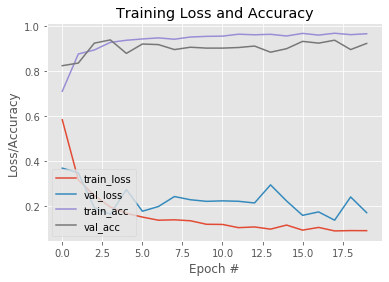

In [32]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")